In this project, I perform an Exploratory Data Analysis (EDA) on a dataset containing information about Netflix movies and TV shows. The goal of this analysis is to uncover insights about Netflix content, its distribution across genres, and patterns related to movie and TV show durations, ratings, and other features.

Dataset Overview:
The dataset contains multiple columns related to Netflix's content:

show_id: A unique identifier for each movie or TV show.

type: Indicates whether the content is a movie or TV show.

title: The title of the content.

director: Director of the content (if available).

cast: Cast involved (if available).

country: Country of origin.

date_added: The date the content was added to Netflix.

release_year: Year the content was released.

rating: Content rating.

duration: The duration of the content (in minutes for movies, in seasons for TV shows).

listed_in: The genres that the content belongs to.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('netflix_titles.csv')

In [3]:
# Display the first five rows of the dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Display the last five rows of the dataset
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In this step, I’m loading the Netflix dataset into a Pandas DataFrame. This will allow me to explore and clean the data. The first and last few rows of the dataset are displayed to understand the structure.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df = df.drop_duplicates()

In [8]:
df['country'] = df['country'].fillna('Unknown')
df['director'] = df['director'].fillna('Not Mentioned')
df['cast'] = df['cast'].fillna('Not Mentioned')

In [9]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [10]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In this step, I am handling missing values by filling them with placeholders, converting the date_added column to a datetime object, and creating two new columns — year_added and month_added for further analysis.

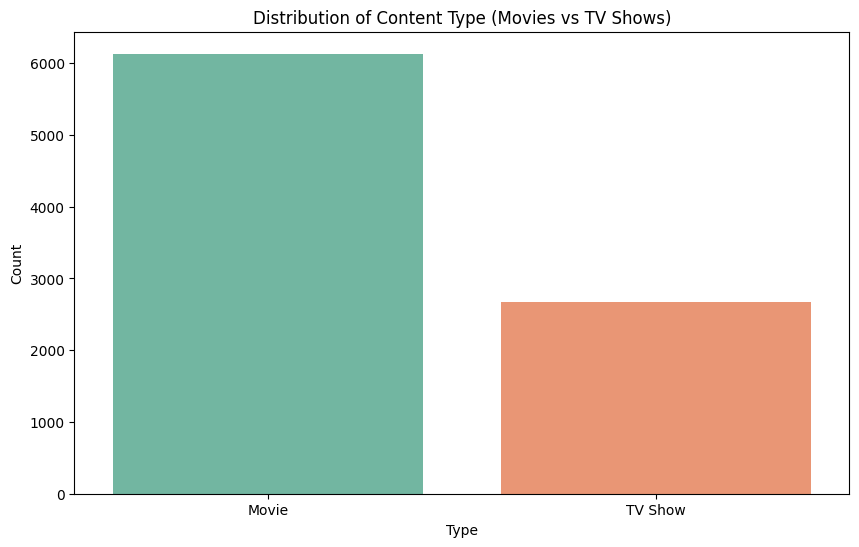

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='type', hue='type', palette='Set2', legend=False)
plt.title("Distribution of Content Type (Movies vs TV Shows)")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

Here, we are visualizing the distribution of content types (Movies vs TV Shows). This helps us understand the proportion of each type of content available on Netflix.

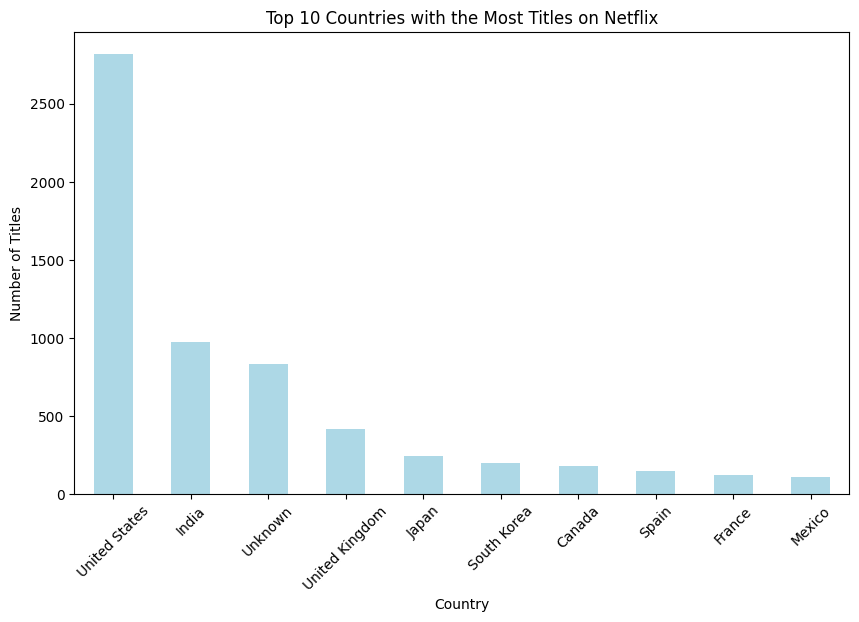

In [12]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar', color='lightblue', figsize=(10,6))
plt.title("Top 10 Countries with the Most Titles on Netflix")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

Next, I’m visualizing the top 10 countries with the most Netflix titles. This gives insight into which countries produce the most content for Netflix.

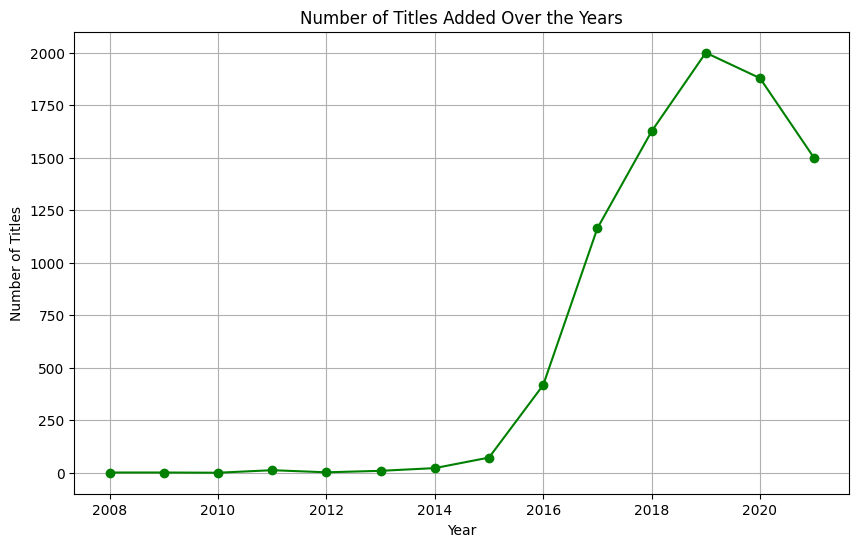

In [13]:
df['year_added'].value_counts().sort_index().plot(kind='line', marker='o', color='green', figsize=(10,6))
plt.title("Number of Titles Added Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()

This plot shows the trend of titles added to Netflix over the years. It helps us understand the growth and expansion of Netflix’s library over time.

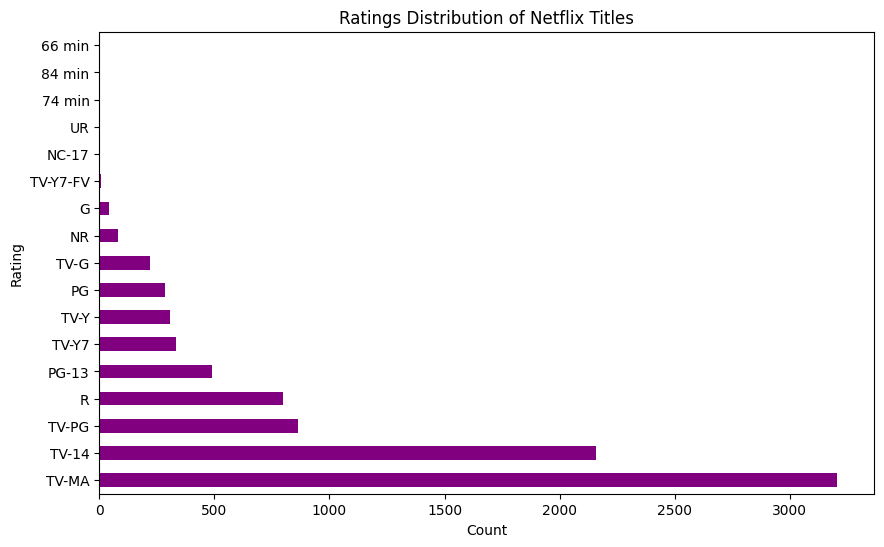

In [14]:
plt.figure(figsize=(10,6))
df['rating'].value_counts().plot(kind='barh', color='purple')
plt.title("Ratings Distribution of Netflix Titles")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()

Here, I’m visualizing the distribution of ratings across all Netflix titles. This shows how titles are rated and can reveal popular content categories.

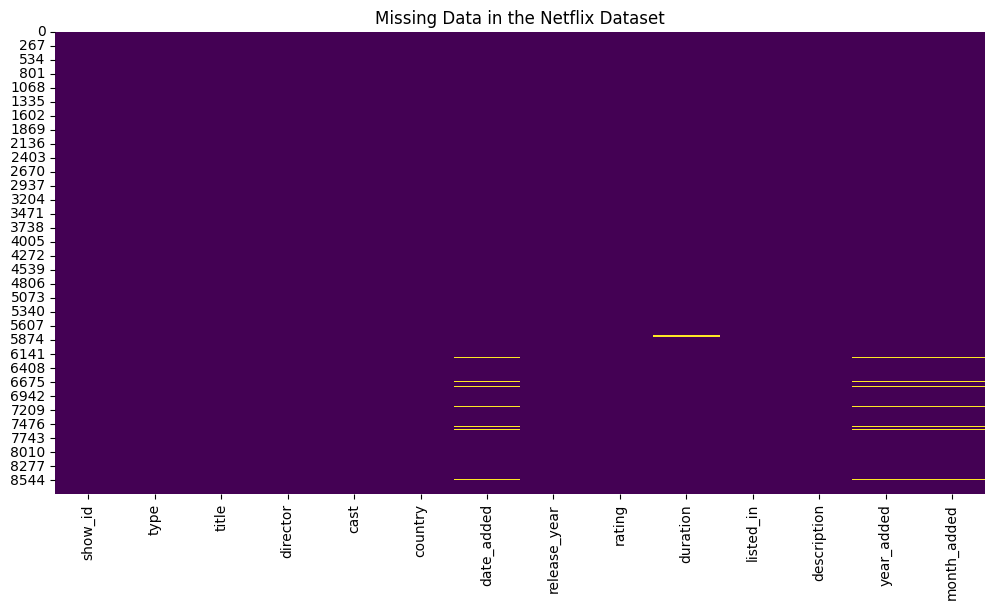

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data in the Netflix Dataset")
plt.show()

This heatmap shows where data is missing in the dataset. It helps identify which columns require further attention during data cleaning.

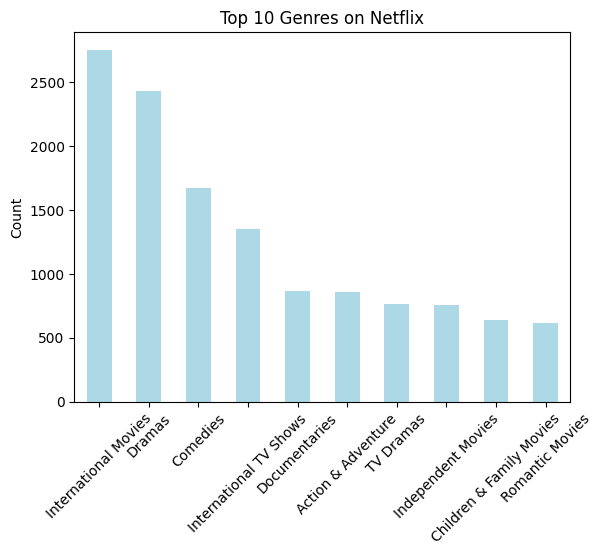

In [19]:
genres = df['listed_in'].dropna().str.split(', ')
all_genres = [genre for sublist in genres for genre in sublist]
top_genres = pd.Series(all_genres).value_counts().head(10)

top_genres.plot(kind='bar', color='lightblue')
plt.title("Top 10 Genres on Netflix")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In this step, I’m identifying the top 10 genres that appear most frequently in Netflix’s library. Genres help classify content and allow users to easily find related content

In this analysis, I explored various aspects of Netflix's content library. 
Key takeaways include:

1. The dataset consists of a balanced number of Movies and TV Shows.
2. The USA and India dominate the Netflix library, accounting for a significant portion of content.
3. Netflix has seen rapid growth in the number of titles added, especially in recent years.
4. The majority of titles are rated "Not Rated," with a few popular ratings like "TV-MA" and "PG".
5. The average duration for movies is about 90 minutes, while TV shows vary based on seasons.

This EDA has provided a strong foundation for further in-depth analysis and could serve as the first step in understanding the overall content strategy on Netflix.

In [22]:
df.to_csv("netflix_data.csv", index=False)